In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
cd /content/drive/My Drive/Kaggle Digit Recogniser

/content/drive/My Drive/Kaggle Digit Recogniser


In [4]:
data = pd.read_csv('./train.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
y_train = data['label']

In [7]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [8]:
y_train.shape

(42000,)

In [9]:
from keras.utils.np_utils import to_categorical

In [10]:
x_train = data.drop('label',axis=1)

In [11]:
x_train = x_train / 255

In [12]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [14]:
y_cat_train = to_categorical(y_train,10)

In [15]:
data_images = []
for i in range(x_train.shape[0]):
    store = np.asarray(x_train.loc[[i][0]])
    store = store.reshape(28,28)
    data_images.append(store)

In [16]:
data_images = np.asarray(data_images)

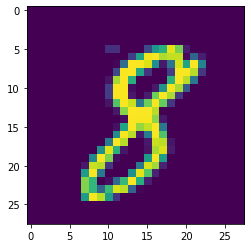

In [17]:
plt.imshow(data_images[20])

In [18]:
data_images.shape

(42000, 28, 28)

In [19]:
data_images[1].max()

1.0

In [20]:
data_images[1].min()

0.0

In [21]:
x_train = data_images.reshape(42000,28,28,1)

In [22]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# POOLING LAYER
model.add(Dropout(0.2))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=126, kernel_size=(3,3), activation='relu'))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# Drop Layer
model.add(Dropout(0.2))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))


# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=4, 
                                            verbose=2, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 126)       72702     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         290560    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 512)         1

In [24]:
model.fit(x_train,y_cat_train,epochs=50)

Epoch 1/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.1707 - accuracy: 0.9466
Epoch 2/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0588 - accuracy: 0.9838
Epoch 3/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0500 - accuracy: 0.9871
Epoch 4/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0463 - accuracy: 0.9888
Epoch 5/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0483 - accuracy: 0.9891
Epoch 6/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0473 - accuracy: 0.9894
Epoch 7/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0548 - accuracy: 0.9897
Epoch 8/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0583 - accuracy: 0.9889
Epoch 9/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0582 - accuracy: 0.9891
Epoch 10/50
1313/1313 [==============================] - 10s 8ms/step - l

In [25]:
test_data = pd.read_csv('./test.csv')
test_data = test_data / 255
data_images = []
for i in range(test_data.shape[0]):
    store = np.asarray(test_data.loc[[i][0]])
    store = store.reshape(28,28)
    data_images.append(store)

In [28]:
from datetime import datetime
data_images = np.asarray(data_images)
test_images = data_images.reshape(28000,28,28,1)
test_predictions = model.predict_classes(test_images)
export = []
for i in range(test_data.shape[0]):
    export.append([i+1,test_predictions[i]])
df = pd.DataFrame(export, columns=['ImageId', 'Label'])
df.to_csv(r'./Submission_'+datetime.today().strftime('%Y-%m-%d-%H:%M:%S')+'.csv',index=False)